In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

def preprocess(data):
    data = data.drop(["Id","PoolQC","MiscFeature", "Alley","FireplaceQu","LotFrontage","TotalBsmtSF","GrLivArea"], axis=1)
    data_new = pd.DataFrame()
    
    #缺失值处理 + 哑编码
    for col in data.columns.values:
#         if data[col].dtypes == "object" :
        if data[col].dtypes == "object":
            col_new = data[col].fillna("Unknown")
            col_new = pd.get_dummies(col_new, prefix=col + "_")
        else:
            col_new = data[col].fillna(data[col].mean())
        data_new = pd.concat([data_new, col_new], axis = 1)
    return data_new

from sklearn.feature_selection import SelectKBest,chi2
df_train = pd.read_csv("trainData.csv")
df_test = pd.read_csv("testData.csv")
# #评估===============================================

#预处理
from sklearn.preprocessing import StandardScaler
X_all = pd.concat([df_train.drop("SalePrice",axis=1),df_test])
X_all_new = preprocess(X_all)
X_train = X_all_new.iloc[:1160,:]
X_test = X_all_new.iloc[1160:,:]
print "X_train.shape is ", X_train.shape
#评估数据集
X_traint = X_train.iloc[:910,:]
X_metric = X_train.iloc[910:1160,:]
# y_traint = df_train["SalePrice"][:910]
y_metric = df_train["SalePrice"][910:]

#模型训练
clf = RandomForestRegressor(n_estimators = 100)
clf.fit(X_traint, y_traint)

from sklearn import svm
clf = svm.SVR()
clf.fit(X_traint, y_traint)

from sklearn import linear_model
reg = linear_model.Lasso(alpha = 110)
reg.fit(X_traint, y_traint)
y_predict = reg.predict(X_metric)
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
print math.sqrt(metrics.mean_squared_error(y_metric, y_predict))


X_train.shape is  (1160, 283)


NameError: name 'y_traint' is not defined

In [2]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


train = pd.read_csv('trainData.csv')
test = pd.read_csv('testData.csv')

train_ID = train['Id']
test_ID = test['Id']
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


## 删除离群值

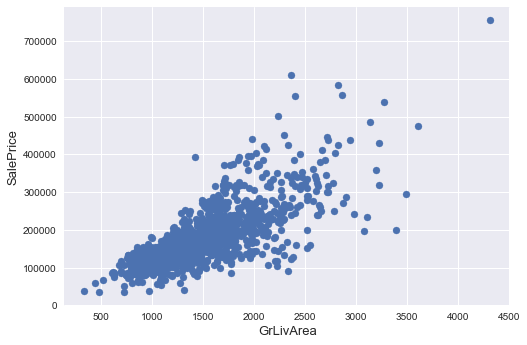

In [3]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 将目标值处理成正态分布


 mu = 180707.85 and sigma = 79030.18



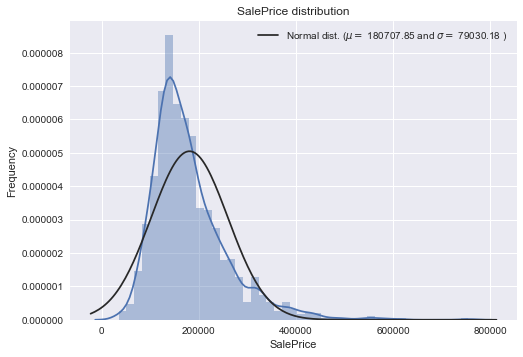

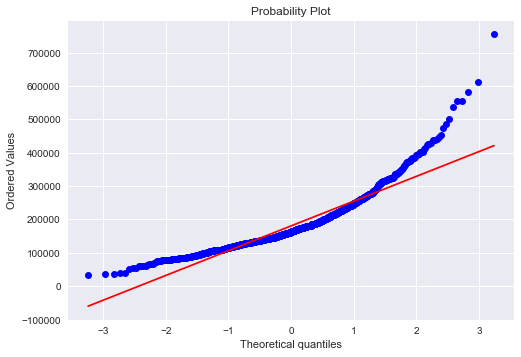


 mu = 12.02 and sigma = 0.40



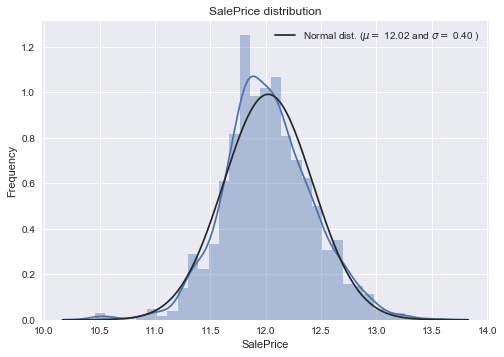

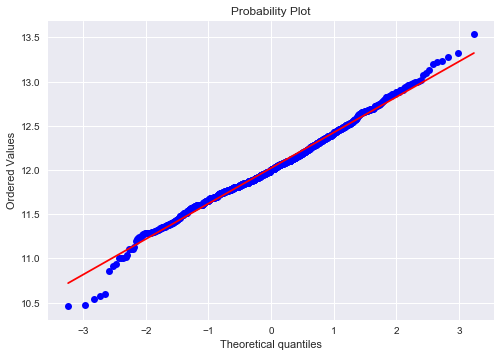

In [4]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


## 缺失值处理

In [5]:
#We impute them by proceeding sequentially through features with missing values
# train_y = train.iloc[:,-1:]
# train = train.drop(["SalePrice"], axis = 1, inplace = True)
all_data = pd.concat([train, test],keys=['train','test'])
#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

#MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

#Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")

#Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")

#FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna("None")
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna("None")

#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")



##  编码

In [6]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

#类别特征哑变量编码
all_data = pd.get_dummies(all_data)

#用于训练的数据集
train_y = all_data["SalePrice"][:1158]
train_X = all_data.iloc[:1158,:].drop(["SalePrice"], axis = 1)
test_X = all_data.iloc[1158:,:].drop(["SalePrice"], axis = 1)
na_count = test_X.isnull().sum().sort_values(ascending=False)
print all_data.shape,train_X.shape,test_X.shape
# print test_X.head(100)


Shape all_data: (1458, 79)

Skew in numerical features: 

There are 60 skewed numerical features to Box Cox transform
(1458, 221) (1158, 220) (300, 220)


## 模型选择

In [7]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X.values)
    rmse= np.sqrt(-cross_val_score(model, train_X.values, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#求模型的baseline
# LASSO Regression :
# This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
# Elastic Net Regression :
# again made robust to outliers

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
# Kernel Ridge Regression :

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
# Gradient Boosting Regression :
# With huber loss that makes it robust to outliers

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.0173 (0.0073)



In [8]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# #评估===============================================

#用于训练的数据集

# #模型训练
# clf = RandomForestRegressor(n_estimators = 100)
# clf.fit(X_traint, y_traint)

# from sklearn import svm
# clf = svm.SVR()
# clf.fit(X_traint, y_traint)
# print test_X.head(100)
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 100)
reg.fit(train_X, train_y)
print train_X.shape,test_X.shape
y_predict = reg.predict(test_X)
result = {"Id":df_test["Id"].values, "SalePrice":y_predict}
pd.DataFrame(result).to_csv("answer.csv",index = False)
print result

(1158, 220) (300, 220)
{'Id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 17

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# #评估===============================================

#用于训练的数据集

X_traint = train_X.iloc[:910,:]
X_metric = train_X.iloc[910:,:]
# y_traint = df_train["SalePrice"][:910]
X_traint = train_y[:910]
y_metric = train_y[910:]
print train_y.shape,y_traint.shape, y_metric.shape, X_metric.shape,X_traint.shape

#模型训练
# clf = RandomForestRegressor(n_estimators = 50)
# clf.fit(X_traint, y_traint)

from sklearn import svm
clf = svm.SVR()
# clf.fit(X_traint, y_traint)

from sklearn import linear_model
reg = linear_model.Lasso(alpha = 100)
reg.fit(X_traint, y_traint)
y_predict = clf.predict(X_metric)



from sklearn import metrics
print math.sqrt(metrics.mean_squared_error(np.power(math.e, y_metric + 1), np.power(math.e, y_predict + 1)))
# print test_X.head(100)

In [ ]:
# sns.distplot(train['SalePrice'] , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(train['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(train['SalePrice'], plot=plt)
# plt.show()
# #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# train["SalePrice"] = np.log1p(train["SalePrice"])

# #Check the new distribution 
# sns.distplot(train['SalePrice'] , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(train['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(train['SalePrice'], plot=plt)
# plt.show()
